In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Loading all data

In [2]:
os.chdir('/Users/karishmavelagaleti/Documents/DataScience.nosync/IMDB/')

In [3]:
path = !pwd

In [4]:
from glob import glob
import os

list_of_files = glob('*.tsv') # list all .tsv files in the folder
list_of_files

['data-5.tsv',
 'data-4.tsv',
 'data.tsv',
 'data-6.tsv',
 'data-7.tsv',
 'data-3.tsv',
 'data-2.tsv']

In [71]:
ratings = pd.read_csv('data.tsv', sep='\t', engine='python')
episodes = pd.read_csv('data-2.tsv', sep='\t', engine = 'python')
crew = pd.read_csv('data-3.tsv', sep='\t', engine='python')
basic = pd.read_csv('data-4.tsv', sep='\t')
name = pd.read_csv('data-5.tsv', sep='\t')
aka = pd.read_csv('data-6.tsv', sep='\t')
principals = pd.read_csv('data-7.tsv', sep='\t')

/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/2766988511.py:4: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  basic = pd.read_csv('data-4.tsv', sep='\t')
/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/2766988511.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  aka = pd.read_csv('data-6.tsv', sep='\t')


In [72]:
# Loading all files in a dictionary 

files = {
            'name':name,
            'aka':aka, 
            'basics':basic,
            'crew':crew, 
            'episodes':episodes, 
            'principals':principals, 
            'ratings':ratings
        }

In [7]:
# Listing all file lengths in one command 

for i in files:
    print(i, "file length = ", '{:,}'.format(len(files[i])))

name file length =  11,832,859
aka file length =  32,765,327
basics file length =  9,130,101
crew file length =  9,130,101
episodes file length =  6,872,335
principals file length =  51,502,123
ratings file length =  1,259,218


In [ ]:
# Listing all file lengths in one command 

for i in files:
    print(i, "file length = ", '{:,}'.format(len(files[i])))

In [8]:
# Checking for NULL values

print('Checking for columns which have null values in each file: \n')

for i in files: 
    v = files[i].isna().sum().values 
    k = files[i].isna().sum().keys()
    res = {k[j]:v[j] for j in range(len(k))}
    print(i, '-->', res)

Checking for columns which have null values in each file: 

name --> {'nconst': 0, 'primaryName': 0, 'birthYear': 0, 'deathYear': 0, 'primaryProfession': 2533525, 'knownForTitles': 0}
aka --> {'titleId': 0, 'ordering': 0, 'title': 5, 'region': 103, 'language': 0, 'types': 0, 'attributes': 0, 'isOriginalTitle': 0}
basics --> {'tconst': 0, 'titleType': 0, 'primaryTitle': 11, 'originalTitle': 11, 'isAdult': 0, 'startYear': 0, 'endYear': 0, 'runtimeMinutes': 0, 'genres': 10}
crew --> {'tconst': 0, 'directors': 0, 'writers': 0}
episodes --> {'tconst': 0, 'parentTconst': 0, 'seasonNumber': 0, 'episodeNumber': 0}
principals --> {'tconst': 0, 'ordering': 0, 'nconst': 0, 'category': 0, 'job': 0, 'characters': 0}
ratings --> {'tconst': 0, 'averageRating': 0, 'numVotes': 0}


## Data Exploration 

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [10]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1901
1,tt0000002,5.9,254
2,tt0000003,6.5,1694
3,tt0000004,5.7,166
4,tt0000005,6.2,2510


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253462 entries, 0 to 1253461
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1253462 non-null  object 
 1   averageRating  1253462 non-null  float64
 2   numVotes       1253462 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ MB


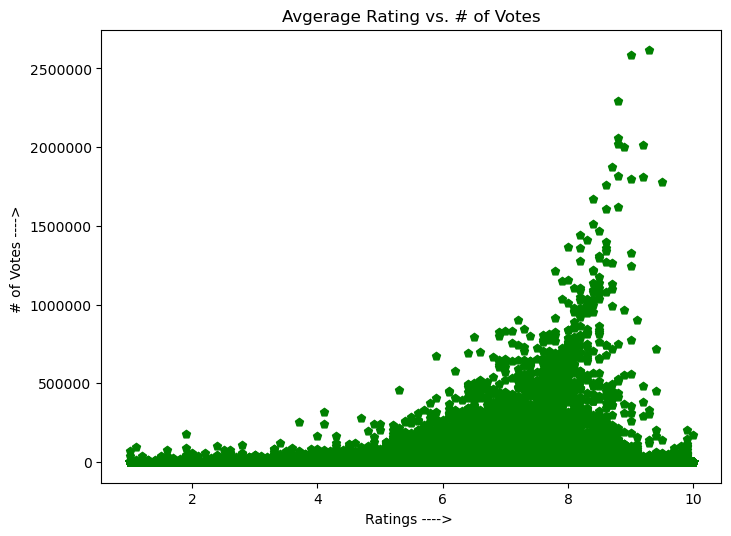

In [55]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
plt.title('Avgerage Rating vs. # of Votes')
plt.xlabel("Ratings ----> ")
plt.ylabel("# of Votes ----> ")
plt.scatter(ratings['averageRating'], ratings['numVotes'], marker='p', color='green')
plt.ticklabel_format(style='plain')
plt.show()

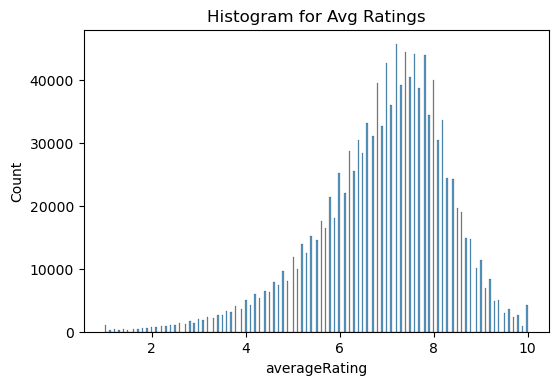

In [94]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
plt.title('Histogram for Avg Ratings')
sns.histplot(x='averageRating', data=ratings)
plt.show()

In [92]:
len(ratings[ratings["averageRating"]>6])/len(ratings)

0.7707517260196161

In [149]:
sum(ratings["averageRating"])/len(ratings)

6.919418458636966

In [52]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253462 entries, 0 to 1253461
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1253462 non-null  object 
 1   averageRating  1253462 non-null  float64
 2   numVotes       1253462 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ MB


In [54]:
ratings[ratings["averageRating"]>6]["averageRating"].value_counts()

7.2     45701
7.4     44503
7.6     44155
7.8     43906
7.0     42752
7.5     40406
8.0     39934
6.8     39458
7.3     39234
7.7     38649
7.1     36014
7.9     34437
8.2     33573
6.6     33125
6.9     32732
6.7     31127
6.4     30417
8.1     30403
6.2     28760
6.5     28364
6.3     25599
8.3     24484
8.4     24284
6.1     22095
8.5     19700
8.6     19093
8.7     14966
8.8     14704
9.0     11370
8.9     10135
9.2      8356
9.1      6976
9.4      5032
9.3      4890
10.0     4199
9.6      3563
9.5      3002
9.8      2632
9.7      2407
9.9       971
Name: averageRating, dtype: int64

In [14]:
name.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0072308,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0056404,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0060827,tt0050976"


In [22]:
len(name["primaryName"].unique())

9196080

In [37]:
name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11804374 entries, 0 to 11804373
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 540.4+ MB


In [38]:
name.isna().sum()

nconst                     0
primaryName                0
birthYear                  0
deathYear                  0
primaryProfession    2533525
knownForTitles             0
dtype: int64

In [44]:
name["birthYear"].value_counts()

\N      11247777
1980        9250
1979        8999
1981        8974
1978        8947
          ...   
1449           1
1597           1
1489           1
1736           1
1631           1
Name: birthYear, Length: 515, dtype: int64

In [49]:
name['deathYear'].replace('\\N', '0',inplace =True)
name['birthYear'].replace('\\N', '0',inplace =True)

In [51]:
name["Age"] = name["deathYear"].astype('int') - name["birthYear"].astype('int')

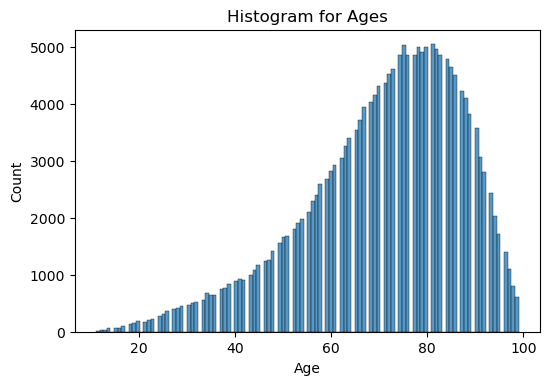

In [60]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
plt.title('Histogram for Ages')
sns.histplot(x='Age', data=name[((name["Age"]>10) & (name["Age"]<100))])
plt.show()

#### We don't have enough clean data for Age

In [61]:
len(name[~((name["Age"]>10) & (name["Age"]<100))])/len(name)

0.9838633543803339

In [62]:
len(name[((name["Age"]>10) & (name["Age"]<100))])/len(name)

0.016136645619666067

In [20]:
basic.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [23]:
basic["titleType"].unique()

array(['short', 'movie', 'tvEpisode', 'tvSeries', 'tvShort', 'tvMovie',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [150]:
basic["isAdult"].value_counts()

0       8753194
1        280645
0         63399
1          2136
2019          3
2020          2
1981          1
2017          1
\N            1
2014          1
2005          1
Name: isAdult, dtype: int64

In [152]:
basic["genres"].str.split(',')[0][0]

'Documentary'

### 75% of titles are TV episodes

In [35]:
(basic["titleType"].value_counts()/len(basic))*100

tvEpisode       75.259831
short            9.682403
movie            6.776887
video            2.894383
tvSeries         2.513731
tvMovie          1.504629
tvMiniSeries     0.488440
tvSpecial        0.414687
videoGame        0.348265
tvShort          0.116722
tvPilot          0.000022
Name: titleType, dtype: float64

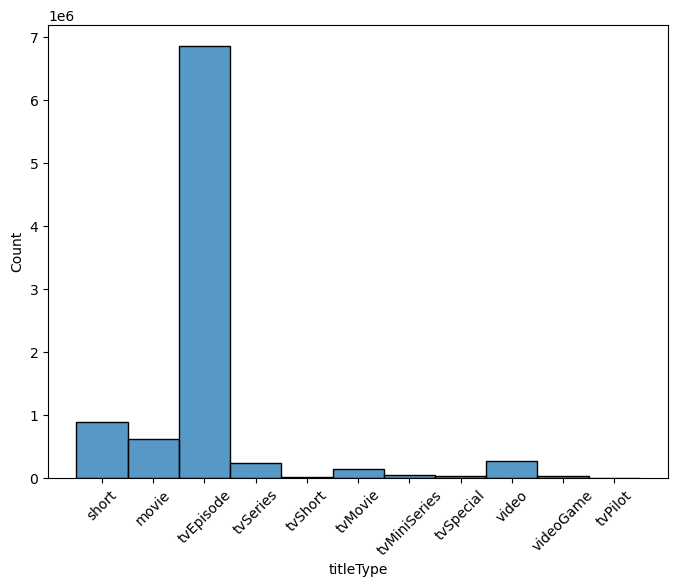

In [109]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
p = sns.histplot(x='titleType', data=basic)
plt.xticks(rotation=45)
plt.show()

In [36]:
(basic["startYear"].value_counts()/len(basic))*100

\N      13.253194
2021     4.605466
2018     4.590355
2017     4.570716
2019     4.452862
          ...    
2000     0.000011
1988     0.000011
2014     0.000011
1980     0.000011
1885     0.000011
Name: startYear, Length: 254, dtype: float64

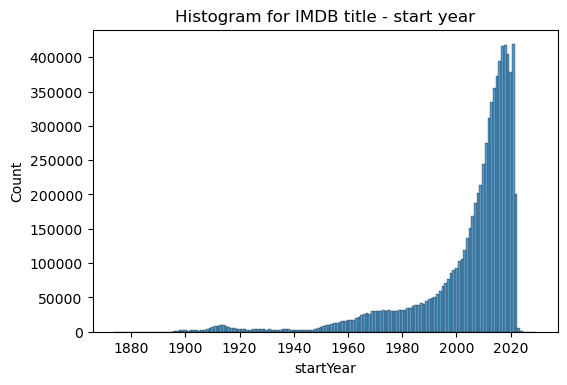

In [63]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
plt.title('Histogram for IMDB title - start year')
sns.histplot(x='startYear', data=basic[basic["startYear"]!='\\N'])
plt.show()

In [65]:
basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9099384 entries, 0 to 9099383
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 624.8+ MB


In [68]:
basic["runtimeMinutes"].unique()

array(['1', '5', '4', '12', '45', '2', '\\N', '0', '3', '20', '13', '6',
       '40', '11', '9', '10', '8', '15', '21', '16', '14', '7', '24',
       '100', '17', '70', '90', '25', '120', '36', '18', '30', '19', '44',
       '38', '58', '22', '33', '50', '34', '28', '35', '42', '23', '51',
       '52', '60', '92', '56', '26', '53', '31', '41', '48', '47', '68',
       '29', '71', '43', '46', '27', '32', '76', '85', '55', '150', '300',
       '121', '89', '37', '69', '54', '64', '96', '49', '61', '39', '101',
       '57', '99', '110', '88', '86', '170', '72', '78', '75', '450',
       '148', '80', '124', '220', '59', '63', '112', '1428', '84', '65',
       '74', '105', '310', '73', '82', '81', '199', '139', '109', '67',
       '219', '195', '440', '77', '293', '97', '62', '250', '421', '360',
       '180', '66', '93', '163', '400', '104', '95', '140', '165', '116',
       '83', '320', '125', '127', '138', '460', '350', '374', '480', '91',
       '87', '130', '108', '79', '136', '94', '6

In [17]:
episodes.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0020829,tt15180956,1,1
2,tt0021166,tt15180956,1,3
3,tt0021612,tt15180956,2,2
4,tt0021655,tt15180956,2,5


In [69]:
episodes["seasonNumber"].value_counts()

1       3406423
\N      1446828
2        535079
3        304103
4        204836
         ...   
2005          1
9999          1
947           1
1971          1
1980          1
Name: seasonNumber, Length: 392, dtype: int64

In [75]:
episodes["seasonNumber"].replace('\\N', '0', inplace=True)

In [76]:
episodes["seasonNumber"] =episodes["seasonNumber"].astype('int')

In [79]:
episodes["seasonNumber"].value_counts()

1       3406423
0       1446828
2        535079
3        304103
4        204836
         ...   
2005          1
9999          1
947           1
1971          1
1980          1
Name: seasonNumber, Length: 392, dtype: int64

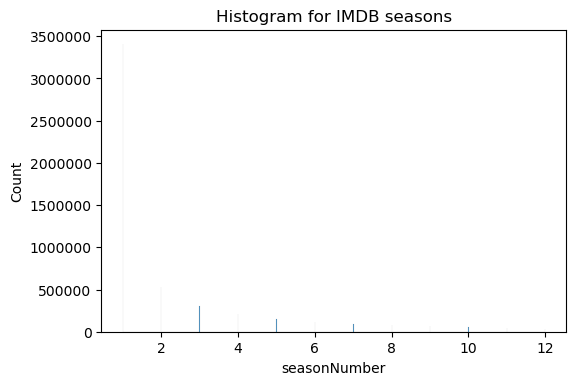

In [104]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
plt.title('Histogram for IMDB seasons')
sns.histplot(x='seasonNumber', data=episodes[(episodes["seasonNumber"]<=12) & (episodes["seasonNumber"]!=0)])
plt.ticklabel_format(style='plain')
plt.show()

In [90]:
episodes["tconst"].value_counts()

tt0020666     1
tt3287930     1
tt3288110     1
tt3288106     1
tt3288104     1
             ..
tt14085334    1
tt14085330    1
tt1408532     1
tt14085328    1
tt9916880     1
Name: tconst, Length: 6847882, dtype: int64

In [16]:
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [111]:
(principals["category"].value_counts()/len(principals))*100

actor                  22.178649
self                   17.393550
actress                17.023297
writer                 13.859866
director               11.550862
producer                6.444229
cinematographer         3.477356
composer                3.420408
editor                  3.330244
production_designer     0.674818
archive_footage         0.640351
archive_sound           0.006371
Name: category, dtype: float64

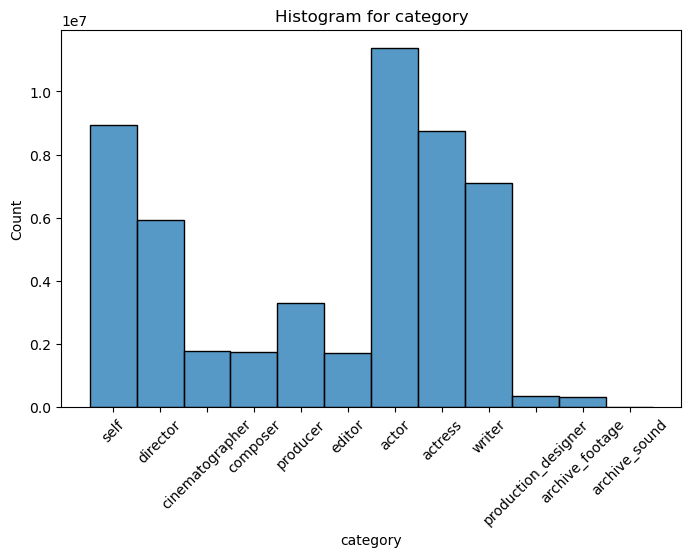

In [107]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
plt.title('Histogram for category')
sns.histplot(x='category', data=principals)
plt.xticks(rotation=45)
plt.show()

In [101]:
principals["characters"].value_counts()

\N                             26219856
["Self"]                        3811778
["Self - Host"]                 1537553
["Self - Guest"]                 278920
["Self - Presenter"]             270580
                                 ...   
["Sista Burns"]                       1
["Mme Marie, la concierge"]           1
["Pamela Bradley"]                    1
["Martin Lukas"]                      1
["Judah Harris"]                      1
Name: characters, Length: 2627330, dtype: int64

In [108]:
principals["job"].value_counts(20)

\N                                  8.361172e-01
producer                            6.330750e-02
writer                              1.805828e-02
written by                          9.458703e-03
creator                             9.072888e-03
                                        ...     
novel "Die Sonnenuhr"               1.948268e-08
director: planning part             1.948268e-08
novel "Crni dnevi in en bel dan"    1.948268e-08
play "A Bed Full of Foreigners"     1.948268e-08
novel "Breakdown"                   1.948268e-08
Name: job, Length: 37664, dtype: float64

In [18]:
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [103]:
crew["writers"].value_counts()

\N                                                             4428826
nm6352729                                                        12435
nm0934807                                                        11864
nm0914844                                                        11566
nm1271987,nm1667629,nm4390665,nm3089072,nm1956179,nm1335533       9924
                                                                ...   
nm1718142                                                            1
nm11761437                                                           1
nm11750343,nm11750342                                                1
nm11761443                                                           1
nm6951431                                                            1
Name: writers, Length: 1197371, dtype: int64

In [112]:
len(crew[crew["writers"]!='\\N'])/len(crew)

0.5132828771705865

In [19]:
aka.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [138]:
k = pd.DataFrame(aka["region"].value_counts()).reset_index()
k["index"].unique()

array(['FR', 'JP', 'DE', 'IN', 'ES', 'IT', 'PT', '\\N', 'US', 'GB', 'CA',
       'XWW', 'AU', 'BR', 'MX', 'RU', 'GR', 'FI', 'PL', 'HU', 'SE', 'AR',
       'DK', 'NO', 'XWG', 'TR', 'NL', 'PH', 'SUHH', 'BE', 'AT', 'HK',
       'BG', 'CN', 'RO', 'TW', 'KR', 'UA', 'RS', 'ZA', 'CZ', 'SG', 'ID',
       'IE', 'XYU', 'IL', 'AE', 'VE', 'HR', 'CH', 'IR', 'NZ', 'LT', 'VN',
       'CL', 'CSHH', 'DDDE', 'SI', 'EG', 'CO', 'SK', 'PE', 'NG', 'UY',
       'EE', 'XEU', 'TH', 'LV', 'PK', 'MY', 'BD', 'DO', 'IS', 'EC', 'CU',
       'AL', 'BA', 'LB', 'PR', 'LK', 'UZ', 'TN', 'GE', 'NP', 'MA', 'LU',
       'XAS', 'DZ', 'CY', 'AZ', 'BY', 'MK', 'AM', 'CR', 'KZ', 'PA', 'KP',
       'JM', 'YUCS', 'BO', 'SA', 'KE', 'LI', 'GH', 'QA', 'SY', 'IQ', 'MT',
       'XKO', 'UG', 'PY', 'MN', 'JO', 'KW', 'KH', 'GT', 'TT', 'SN', 'CM',
       'MD', 'XKV', 'AF', 'PS', 'BF', 'ME', 'MM', 'SM', 'HT', 'CG', 'KG',
       'XSA', 'MC', 'SV', 'BH', 'GI', 'ZW', 'HN', 'TZ', 'MZ', 'BS', 'ET',
       'CI', 'AO', 'CSXX', 'MO', 'BJ', 'NI', '

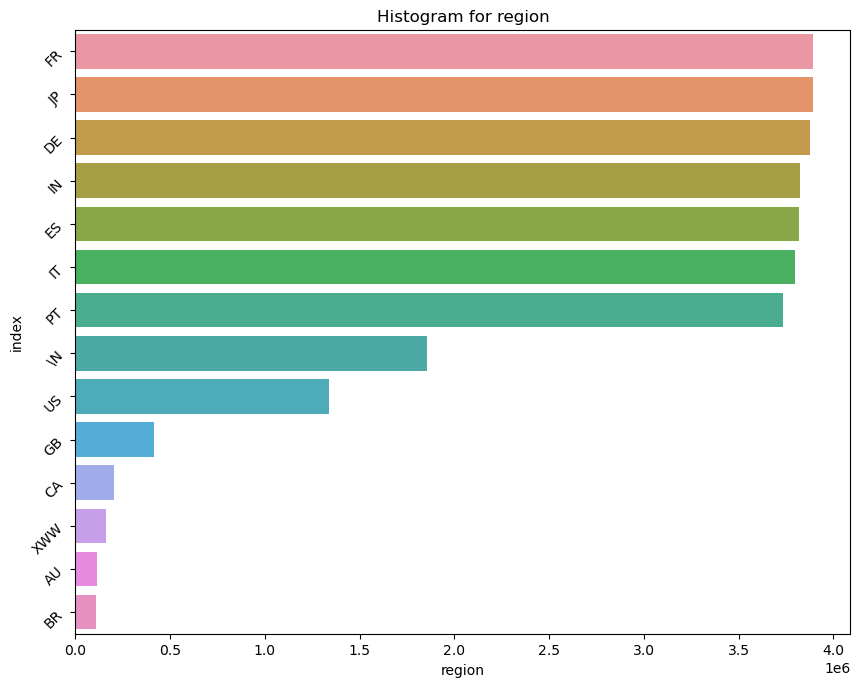

In [143]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

plt.title('Histogram for region')
plt.ylabel("Region")
sns.barplot(x='region',y='index', data=k[k['region']>100000])
plt.yticks(rotation=45)
plt.show()

In [115]:
aka["attributes"].value_counts()

\N                                     32398330
transliterated title                      26880
alternative spelling                      17998
new title                                 17505
literal English title                     14651
                                         ...   
POLart                                        1
8mm release titlesecond part title           1
first three episodes title                    1
X-rated versionbootleg title                 1
YIVO translationreissue title                1
Name: attributes, Length: 188, dtype: int64

In [116]:
aka["isOriginalTitle"].value_counts()

0     18542691
0     12312720
1      1312530
1       471408
\N        2187
Name: isOriginalTitle, dtype: int64

In [117]:
aka["types"].value_counts()

\N                      27416947
imdbDisplay              3210257
original                 1783939
alternative                99994
working                    52043
dvd                        21726
video                      20313
tv                         18248
festival                   17584
dvdimdbDisplay              242
imdbDisplaytv                74
festivalimdbDisplay          66
imdbDisplayworking           31
imdbDisplayvideo             26
alternativetv                 9
tvvideo                       7
alternativedvd                6
alternativeworking            6
videoworking                  5
tvworking                     4
festivalworking               3
alternativevideo              2
dvdvideo                      2
alternativefestival           2
Name: types, dtype: int64

## Data Cleaning 

In [73]:
files.keys()

dict_keys(['name', 'aka', 'basics', 'crew', 'episodes', 'principals', 'ratings'])

basic = pd.read_csv('data-4.tsv', sep='\t')

In [77]:
basic['startYear'].replace('\\N','0', inplace=True)
basic["startYear"] = basic["startYear"].astype('int')

In [78]:
len(basic[basic["startYear"]>=1950])/len(basic)

0.8454041198448955

In [79]:
basic2 = basic[basic["startYear"]>=1950]

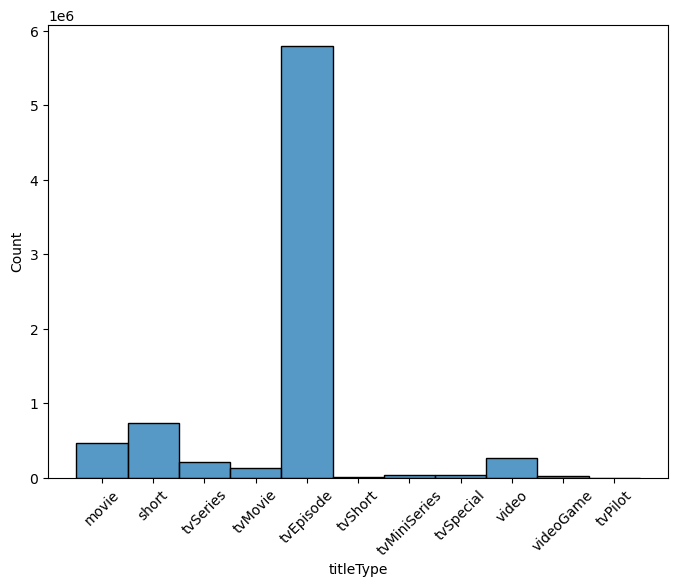

In [80]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
p = sns.histplot(x='titleType', data=basic2)
plt.xticks(rotation=45)
plt.show()

In [81]:
len(basic2)

7718625

In [82]:
basic2.isna().sum()

tconst            0
titleType         0
primaryTitle      7
originalTitle     7
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [83]:
basic2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
11636,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime"
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,\N,133,Documentary
15174,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N
15482,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
21267,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,Western


In [84]:
basic2 = basic2[~basic2["primaryTitle"].isna()==True]

In [85]:
basic2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
11636,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime"
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,\N,133,Documentary
15174,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N
15482,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
21267,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,Western


In [86]:
basic2["endYear"].value_counts()

\N      7624184
2017       5845
2018       5797
2019       5670
2020       5197
         ...   
2025          7
1950          4
2026          2
2027          2
2028          1
Name: endYear, Length: 80, dtype: int64

In [21]:
len(basic2[basic2["runtimeMinutes"]=='\\N'])/len(basic2)

0.6954577879097009

In [88]:
basic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7718618 entries, 11636 to 9130100
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       int64 
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: int64(1), object(8)
memory usage: 588.9+ MB


In [87]:
basic2["runtimeMinutes"].value_counts()

\N       5367973
30        128864
60         98598
22         90010
44         67476
          ...   
1444           1
28643          1
1845           1
1445           1
2088           1
Name: runtimeMinutes, Length: 859, dtype: int64

In [89]:
basic2["runtimeMinutes"].replace('\\N', np.nan, inplace=True)
basic2["endYear"].replace('\\N', '9999', inplace=True)
basic2["endYear"] = basic2["endYear"].astype('int')

In [90]:
basic2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
11636,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,9999,NaN,"Action,Crime"
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,9999,133,Documentary
15174,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,9999,60,\N
15482,tt0015724,movie,Dama de noche,Dama de noche,0,1993,9999,102,"Drama,Mystery,Romance"
21267,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,9999,56,Western


In [91]:
len(basic2[basic2["genres"]=='\\N'])/len(basic2)

0.04248208681916892

In [92]:
list(basic2["genres"].unique())

['Action,Crime',
 'Documentary',
 '\\N',
 'Drama,Mystery,Romance',
 'Western',
 'Drama',
 'Drama,Musical',
 'Comedy',
 'Biography,Drama',
 'Animation,Comedy,Family',
 'Animation,Short',
 'Short',
 'Comedy,Fantasy,Romance',
 'Drama,War',
 'Drama,Family',
 'Action,Adventure,Mystery',
 'Adventure',
 'Crime',
 'Thriller',
 'Drama,History',
 'Documentary,War',
 'Adventure,History',
 'Comedy,Western',
 'Comedy,Drama',
 'Crime,Drama',
 'Drama,Musical,Romance',
 'Comedy,Fantasy',
 'Short,Western',
 'Comedy,Drama,Music',
 'Family,Western',
 'Game-Show',
 'Family',
 'Documentary,Short',
 'Adventure,Drama,History',
 'Adventure,Drama',
 'Drama,Romance',
 'Comedy,Romance',
 'Animation,Music,Short',
 'Crime,Film-Noir,Thriller',
 'Action,Adventure,Romance',
 'Crime,Drama,Thriller',
 'Documentary,Sport',
 'Drama,Romance,War',
 'Comedy,Drama,Family',
 'Drama,Short,Western',
 'Biography,Drama,History',
 'Fantasy',
 'Comedy,Romance,Western',
 'Action,Music,Western',
 'Comedy,Musical',
 'Crime,Drama,Roman

In [93]:
basic2["genres"].replace('\\N', None, inplace=True)

In [94]:
basic2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
11636,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,9999,NaN,"Action,Crime"
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,9999,133,Documentary
15174,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,9999,60,None
15482,tt0015724,movie,Dama de noche,Dama de noche,0,1993,9999,102,"Drama,Mystery,Romance"
21267,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,9999,56,Western


In [95]:
basic2.isna().sum()

tconst                  0
titleType               0
primaryTitle            0
originalTitle           0
isAdult                 0
startYear               0
endYear                 0
runtimeMinutes    5367973
genres             327903
dtype: int64

In [96]:
basic2[basic2["genres"].isna()==True]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15174,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,9999,60,None
35698,tt0036345,movie,Honour Is Precious,Al-sharaf ghali,0,1951,9999,NaN,None
37070,tt0037745,movie,Glück muß man haben,Glück muß man haben,0,1950,9999,78,None
37719,tt0038405,movie,El centauro,El centauro,0,1950,9999,87,None
39250,tt0039952,movie,Vecchio cinema... che passione!,Vecchio cinema... che passione!,0,1957,9999,NaN,None
...,...,...,...,...,...,...,...,...,...
9129754,tt9916130,tvSeries,Tot Art,Tot Art,0,1976,9999,NaN,None
9130014,tt9916672,tvEpisode,L'échange,L'échange,0,2007,9999,NaN,None
9130020,tt9916684,tvEpisode,Otages (1e partie),Otages (1e partie),0,2007,9999,NaN,None
9130027,tt9916700,tvEpisode,Apex Cartoon - Meet the Legends,Apex Cartoon - Meet the Legends,0,2019,9999,NaN,None


In [172]:
basic2[["genre1", "genre2", "genre3"]] = basic2["genres"].str.split(',', expand = True)

In [173]:
basic2.to_csv('Basic.csv',index=False)

In [98]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1903
1,tt0000002,5.9,255
2,tt0000003,6.5,1698
3,tt0000004,5.7,167
4,tt0000005,6.2,2518


In [99]:
tconst = basic2['tconst']

In [139]:
tconst

11636      tt0011801
13079      tt0013274
15174      tt0015414
15482      tt0015724
21267      tt0021617
             ...    
9130096    tt9916848
9130097    tt9916850
9130098    tt9916852
9130099    tt9916856
9130100    tt9916880
Name: tconst, Length: 7718618, dtype: object

In [101]:
ratings2 = ratings[ratings["tconst"].isin(tconst)==True]

In [100]:
len(ratings)

1259218

In [102]:
len(ratings2)

1216615

In [103]:
ratings2.isna().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [104]:
ratings2.to_csv('ratings.csv', index=False)

In [34]:
files.keys()

dict_keys(['name', 'aka', 'basics', 'crew', 'episodes', 'principals', 'ratings'])

In [105]:
aka.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [106]:
aka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32765327 entries, 0 to 32765326
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 2.0+ GB


In [107]:
aka.isna().sum()

titleId              0
ordering             0
title                5
region             104
language             0
types                0
attributes           0
isOriginalTitle      0
dtype: int64

In [108]:
aka[aka["region"].isna()==True]

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
1599256,tt0319739,2,Leni Riefenstahl im Sudan,NaN,\N,imdbDisplay,\N,0
1603382,tt0321284,1,An Argument About a Marriage,NaN,\N,imdbDisplay,\N,0
1603624,tt0321379,1,Baobab Play,NaN,\N,imdbDisplay,\N,0
1618061,tt0326513,1,Bitter Melons,NaN,\N,imdbDisplay,\N,0
2906764,tt0855839,1,Imiti ikula,NaN,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
30666082,tt8790692,1,Journey To The Dead,NaN,\N,imdbDisplay,\N,0
30888384,tt8914498,2,Wrong Way to Hell (After-Life),NaN,\N,imdbDisplay,\N,0
31196000,tt9093870,1,The White Line,NaN,\N,imdbDisplay,\N,0
31396517,tt9199110,1,The Wind on your Skin,NaN,\N,imdbDisplay,\N,0


In [40]:
tconst

11636      tt0011801
13079      tt0013274
15174      tt0015414
15482      tt0015724
21267      tt0021617
             ...    
9130096    tt9916848
9130097    tt9916850
9130098    tt9916852
9130099    tt9916856
9130100    tt9916880
Name: tconst, Length: 7718618, dtype: object

In [56]:
len(tconst)

7718618

In [109]:
aka["language"].value_counts()

\N     6205718
ja     3779636
fr     3745901
hi     3716869
es     3695296
        ...   
rm           1
rn           1
eka          1
sq           1
cr           1
Name: language, Length: 107, dtype: int64

In [110]:
aka["isOriginalTitle"].value_counts()

0     18613528
0     12365353
1      1307229
1       477030
\N        2187
Name: isOriginalTitle, dtype: int64

In [111]:
aka["attributes"].value_counts()

\N                                     32521334
transliterated title                      26941
alternative spelling                      18100
new title                                 17545
literal English title                     14689
                                         ...   
POLart                                        1
8mm release titlesecond part title           1
first three episodes title                    1
X-rated versionbootleg title                 1
YIVO translationreissue title                1
Name: attributes, Length: 188, dtype: int64

In [112]:
aka["types"].value_counts()

\N                      27530046
imdbDisplay              3220015
original                 1784260
alternative               100459
working                    52137
dvd                        21740
video                      20323
tv                         18278
festival                   17584
dvdimdbDisplay              242
imdbDisplaytv                74
festivalimdbDisplay          66
imdbDisplayworking           31
imdbDisplayvideo             26
alternativetv                 9
tvvideo                       7
alternativedvd                6
alternativeworking            6
videoworking                  5
tvworking                     4
festivalworking               3
alternativevideo              2
dvdvideo                      2
alternativefestival           2
Name: types, dtype: int64

In [113]:
aka["region"].value_counts()

FR    3910951
JP    3910187
DE    3893850
IN    3838039
ES    3834110
       ...   
NR          1
NU          1
PW          1
TV          1
TC          1
Name: region, Length: 247, dtype: int64

In [114]:
aka["ordering"].value_counts()

1      6465301
2      5476868
3      4238714
4      3993851
5      3916501
        ...   
209          1
210          1
211          1
212          1
246          1
Name: ordering, Length: 246, dtype: int64

In [115]:
aka["language"].replace('\\N', None, inplace=True)
aka["types"].replace('\\N', None, inplace=True)
aka["attributes"].replace('\\N', None, inplace=True)

In [116]:
aka.columns

Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')

In [117]:
aka2 = aka[aka["titleId"].isin(tconst)==True]

In [118]:
print("aka2 : ", len(aka2))
print("aka : ", len(aka))

aka2 :  25224093
aka :  32765327


In [119]:
aka2.to_csv("aka.csv", index=False)

In [135]:
files.keys()

dict_keys(['name', 'aka', 'basics', 'crew', 'episodes', 'principals', 'ratings'])

In [120]:
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [129]:
'{:,}'.format(len(principals))

'51,502,123'

In [122]:
principals.isna().sum()

tconst        0
ordering      0
nconst        0
category      0
job           0
characters    0
dtype: int64

In [131]:
principals["job"].value_counts()

\N                                   43058920
producer                              3264393
writer                                 930499
written by                             487390
creator                                463147
                                       ...   
video game "Dungeon Siege"                  1
novel "Truth Will Prevail"                  1
play "Klaara ja hänen Vihtorinsa"           1
novel "The Lost Country"                    1
sceennplay                                  1
Name: job, Length: 37759, dtype: int64

In [132]:
principals["characters"].value_counts()

\N                          26313054
["Self"]                     3821700
["Self - Host"]              1543560
["Self - Guest"]              279702
["Self - Presenter"]          271603
                              ...   
["Éric Nardier"]                   1
["Brigitte Nardier"]               1
["Martin Martienzen"]              1
["plk. Vladimír Kempný"]           1
["Judah Harris"]                   1
Name: characters, Length: 2633328, dtype: int64

In [133]:
principals["category"].value_counts()

actor                  11418706
self                    8957547
actress                 8766843
writer                  7142800
director                5949697
producer                3322908
cinematographer         1787930
composer                1759417
editor                  1715954
production_designer      346405
archive_footage          330264
archive_sound              3652
Name: category, dtype: int64

In [136]:
principals["nconst"].value_counts()

nm0914844     24264
nm0934807     16486
nm6352729     16093
nm0438471     14412
nm0438506     14246
              ...  
nm7037630         1
nm13362012        1
nm2487574         1
nm13362030        1
nm10538653        1
Name: nconst, Length: 4751103, dtype: int64

In [137]:
principals["characters"].replace('\\N', None, inplace=True)
principals["job"].replace('\\N', None, inplace=True)

In [138]:
principals["characters"].value_counts()

["Self"]                    3821700
["Self - Host"]             1543560
["Self - Guest"]             279702
["Self - Presenter"]         271603
["Self - Panelist"]          214695
                             ...   
["Éric Nardier"]                  1
["Brigitte Nardier"]              1
["Martin Martienzen"]             1
["plk. Vladimír Kempný"]          1
["Judah Harris"]                  1
Name: characters, Length: 2633327, dtype: int64

In [141]:
principals2 = principals[principals["tconst"].isin(tconst)==True]

In [146]:
print("OLD --> ",'{:,}'.format(len(principals))," : NEW -->  ", '{:,}'.format(len(principals2)))

OLD -->  51,502,123  : NEW -->   44,601,599


In [147]:
principals2.to_csv('principals.csv', index=False)

In [143]:
files.keys()

dict_keys(['name', 'aka', 'basics', 'crew', 'episodes', 'principals', 'ratings'])

In [148]:
name.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0038355,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0057345,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0072562,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"


In [151]:
'{:,}'.format(len(name))

'11,832,859'

In [152]:
name.isna().sum()

nconst                     0
primaryName                0
birthYear                  0
deathYear                  0
primaryProfession    2540898
knownForTitles             0
dtype: int64

In [155]:
name["knownForTitles"].tail()

11832854    tt14069590,tt2455546,tt11657662
11832855                                 \N
11832856                          tt8736744
11832857                                 \N
11832858                                 \N
Name: knownForTitles, dtype: object

In [160]:
 name[["title1", "title2", "title3", "title4", "title5", "title6"]] = name["knownForTitles"].str.split(',', expand=True)

In [163]:
name2 = name[((name["title1"].isin(tconst)==True) | 
      (name["title2"].isin(tconst)==True) | 
      (name["title3"].isin(tconst)==True) | 
      (name["title4"].isin(tconst)==True) | 
      (name["title5"].isin(tconst)==True) | 
      (name["title6"].isin(tconst)==True))]

In [166]:
name2.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,title1,title2,title3,title4,title5,title6
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308",tt0031983,tt0050419,tt0053137,tt0072308,None,None
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0038355,tt0037382,tt0117057",tt0071877,tt0038355,tt0037382,tt0117057,None,None
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0057345,tt0056404",tt0049189,tt0054452,tt0057345,tt0056404,None,None
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0072562,tt0080455,tt0078723",tt0077975,tt0072562,tt0080455,tt0078723,None,None
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827",tt0083922,tt0050976,tt0050986,tt0060827,None,None


In [168]:
name2[["prof1", "prof2", "prof3"]] = name2["primaryProfession"].str.split(',', expand=True)

/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/2273899976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name2[["prof1", "prof2", "prof3"]] = name2["primaryProfession"].str.split(',', expand=True)
/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/2273899976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name2[["prof1", "prof2", "prof3"]] = name2["primaryProfession"].str.split(',', expand=True)
/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/2273899

In [164]:
name2["birthYear"].value_counts()

\N      8929009
1980       9009
1979       8815
1981       8769
1978       8747
         ...   
1180          1
1048          1
1532          1
1474          1
1631          1
Name: birthYear, Length: 489, dtype: int64

In [165]:
name2["deathYear"].value_counts()

\N      9270192
2021       5987
2020       5865
2019       5109
2016       4948
         ...   
1780          1
1123          1
1591          1
1758          1
1700          1
Name: deathYear, Length: 433, dtype: int64

In [169]:
name2["birthYear"].replace('\\N', '0', inplace=True)
name2["birthYear"] = name2["birthYear"].astype('int')
name2["deathYear"].replace('\\N', '9999', inplace=True)
name2["deathYear"] = name2["deathYear"].astype('int')

/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/868425842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name2["birthYear"].replace('\\N', '0', inplace=True)
/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/868425842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name2["birthYear"] = name2["birthYear"].astype('int')
/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/868425842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [170]:
name2.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,title1,title2,title3,title4,title5,title6,prof1,prof2,prof3
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308",tt0031983,tt0050419,tt0053137,tt0072308,None,None,soundtrack,actor,miscellaneous
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0038355,tt0037382,tt0117057",tt0071877,tt0038355,tt0037382,tt0117057,None,None,actress,soundtrack,None
2,nm0000003,Brigitte Bardot,1934,9999,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0057345,tt0056404",tt0049189,tt0054452,tt0057345,tt0056404,None,None,actress,soundtrack,music_department
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0072562,tt0080455,tt0078723",tt0077975,tt0072562,tt0080455,tt0078723,None,None,actor,soundtrack,writer
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827",tt0083922,tt0050976,tt0050986,tt0060827,None,None,writer,director,actor


In [174]:
len(name2)

9428449

In [176]:
name2["birthYear"].value_counts()

0       8929009
1980       9009
1979       8815
1981       8769
1978       8747
         ...   
1180          1
1048          1
1532          1
1474          1
1631          1
Name: birthYear, Length: 489, dtype: int64

In [177]:
name2.to_csv("name.csv",index=False)

In [178]:
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [179]:
crew.isna().sum()

tconst       0
directors    0
writers      0
dtype: int64

In [182]:
len(crew[crew["tconst"].isin(tconst)==True])

7718618

In [181]:
len(crew)

9130101

In [191]:
crew2 = crew[crew["tconst"].isin(tconst)==True]

In [184]:
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [186]:
crew2["writers"].value_counts()

\N                                                   3859142
nm0914844                                              11482
nm0417224                                               5468
nm2429688                                               4365
nm0006724,nm0512728                                     3821
                                                      ...   
nm0845305                                                  1
nm4098468,nm0923839                                        1
nm11933201                                                 1
nm3886185,nm5876759,nm3756185,nm8090775,nm7645727          1
nm6951431                                                  1
Name: writers, Length: 1105288, dtype: int64

In [192]:
crew2["directors"].value_counts()

\N            3323865
nm0022750        6340
nm0565214        5967
nm0107757        4084
nm0141225        3449
               ...   
nm12787325          1
nm11177893          1
nm9398676           1
nm12787244          1
nm10538645          1
Name: directors, Length: 833297, dtype: int64

In [193]:
crew2["writers"].replace('\\N', None, inplace=True)
crew2["directors"].replace('\\N', None, inplace=True)

/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/2750830523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crew2["writers"].replace('\\N', None, inplace=True)
/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/2750830523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crew2["directors"].replace('\\N', None, inplace=True)


In [194]:
crew2.head()

,tconst,directors,writers
11636,tt0011801,nm0681726,"nm0483944,nm0681726"
13079,tt0013274,"nm0412842,nm0895048",None
15174,tt0015414,nm0615736,None
15482,tt0015724,nm0529960,"nm0529960,nm1597742"
21267,tt0021617,nm0289297,nm0119378


In [195]:
crew2["directors"].value_counts()

nm0022750     6340
nm0565214     5967
nm0107757     4084
nm0141225     3449
nm7809044     3200
              ... 
nm12787325       1
nm11177893       1
nm9398676        1
nm12787244       1
nm10538645       1
Name: directors, Length: 833296, dtype: int64

In [196]:
crew2.to_csv("crew.csv", index=False)

episodes = pd.read_csv('data-2.tsv', sep='\t', engine = 'python')

In [211]:
episodes.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0020829,tt15180956,1,1
2,tt0021166,tt15180956,1,3
3,tt0021612,tt15180956,2,2
4,tt0021655,tt15180956,2,5


In [212]:
len(episodes[episodes["tconst"].isin(tconst)==True])

5790829

In [213]:
len(episodes)

6872335

In [214]:
episodes.isna().sum()

tconst           0
parentTconst     0
seasonNumber     0
episodeNumber    0
dtype: int64

In [215]:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6872335 entries, 0 to 6872334
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tconst         object
 1   parentTconst   object
 2   seasonNumber   object
 3   episodeNumber  object
dtypes: object(4)
memory usage: 209.7+ MB


In [216]:
episodes["seasonNumber"].value_counts()

1       3419845
\N      1451161
2        536652
3        305318
4        205475
         ...   
2001          1
2005          1
219           1
1973          1
1980          1
Name: seasonNumber, Length: 393, dtype: int64

In [217]:
episodes["episodeNumber"].value_counts()

\N       1451161
1         255939
2         230291
3         219725
4         205377
          ...   
15147          1
15149          1
15150          1
15152          1
18081          1
Name: episodeNumber, Length: 15719, dtype: int64

In [218]:
episodes2 = episodes[episodes["tconst"].isin(tconst)==True]


In [219]:
episodes2["seasonNumber"].replace('\\N','0', inplace=True )
episodes2["episodeNumber"].replace('\\N', '0', inplace=True)

/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/4040178324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episodes2["seasonNumber"].replace('\\N','0', inplace=True )
/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/4040178324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episodes2["episodeNumber"].replace('\\N', '0', inplace=True)


In [222]:
len(episodes2)

5790829

In [226]:
episodes2["seasonNumber"] = episodes2["seasonNumber"].astype('int')
episodes2["episodeNumber"] = episodes2["episodeNumber"].astype('int')

/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/358714347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episodes2["seasonNumber"] = episodes2["seasonNumber"].astype('int')
/var/folders/kh/898hvqss4wl2cmb9ynmd_1qh0000gn/T/ipykernel_11145/358714347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episodes2["episodeNumber"] = episodes2["episodeNumber"].astype('int')


In [227]:
episodes2.head()

,tconst,parentTconst,seasonNumber,episodeNumber
115,tt0042816,tt0989125,1,17
116,tt0042889,tt0989125,0,0
117,tt0043426,tt0040051,3,42
118,tt0043631,tt0989125,2,16
119,tt0043693,tt0989125,2,8


In [223]:
episodes2.to_csv("episodes.csv", index=False)